Netflix is one of the largest providers of online streaming services. It collects a huge amount of data because it has a very large subscriber base. In this article, I’m going to introduce you to a data science project on Netflix data analysis with Python.

**Netflix Data Analysis**

We can analyze a lot of data and models from Netflix because this platform has consistently focused on changing business needs by shifting its business model from on-demand DVD movie rental and now focusing a lot about the production of their original shows.


In this article, I’ll take a look at some very important models of Netflix data to understand what’s best for their business. Some of the most important tasks that we can analyze from Netflix data are:

**Netflix Data Analysis with Python**

Let's start this Netflix data analysis task with Python by importing the dataset and all the Python libraries needed for this task:

In [2]:
import numpy as np # linear algebra
import pandas as pd # for data preparation
import plotly.express as px # for data visualization
from textblob import TextBlob # for sentiment analysis

dff=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')
dff.shape

ModuleNotFoundError: No module named 'textblob'

So the data consists of 8807 rows and 12 columns, now let’s look at the column names:

In [3]:
dff.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**Distribution of Content:**


To begin the task of analyzing Netflix data, I’ll start by looking at the distribution of content ratings on Netflix:

In [1]:
z = dff.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(z, values='counts', names='rating', 
                  title='Distribution of Content Ratings on Netflix',
                  color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show()

NameError: name 'dff' is not defined

The graph above shows that the majority of content on Netflix is categorized as “TV-MA”, which means that most of the content available on Netflix is intended for viewing by mature and adult audiences.

**Top 5 Actors and Directors:**

Now let’s see the top 5 successful directors on this platform:

In [5]:
dff['director']=dff['director'].fillna('No Director Specified')
filtered_directors=pd.DataFrame()
filtered_directors=dff['director'].str.split(',',expand=True).stack()
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='No Director Specified']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop5=directors.head()
directorsTop5=directorsTop5.sort_values(by=['Total Content'])
fig1=px.bar(directorsTop5,x='Total Content',y='Director',title='Top 5 Directors on Netflix')
fig1.show()

From the above graph it is derived that the top 5 directors on this platform are:

1. Rajiv Chilaka

2. Jan Suter

3. Raul Campos

4. Marcus Raboy

5. Suhas Kadav


Now let’s have a look at the top 5 successful actors on this platform:



In [6]:
dff['cast']=dff['cast'].fillna('No Cast Specified')
filtered_cast=pd.DataFrame()
filtered_cast=dff['cast'].str.split(',',expand=True).stack()
filtered_cast=filtered_cast.to_frame()
filtered_cast.columns=['Actor']
actors=filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='No Cast Specified']
actors=actors.sort_values(by=['Total Content'],ascending=False)
actorsTop5=actors.head()
actorsTop5=actorsTop5.sort_values(by=['Total Content'])
fig2=px.bar(actorsTop5,x='Total Content',y='Actor', title='Top 5 Actors on Netflix')
fig2.show()

From the above plot, it is derived that the top 5 actors on Netflix are:

1. Anupam Kher

2. Rupa Bhimani

3. Takahira Sakurai

4. Julie Tejwani

5. Om Puri


**Analyzing Content on Netflix:**

The next thing to analyze from this data is the trend of production over the years on Netflix:

In [7]:
df1=dff[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]
fig3 = px.line(df2, x="Release Year", y="Total Content", color='type',title='Trend of content produced over the years on Netflix')
fig3.show()

**Which year have most releases?**

In [9]:
dff['count']=1

In [10]:
dff.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast Specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1
1,s2,TV Show,Blood & Water,No Director Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,No Director Specified,No Cast Specified,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,No Director Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1


In [11]:
dff1=dff.groupby('release_year').sum().reset_index()
dff2=dff1.tail(20)

<ipython-input-11-21d87cec2910>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



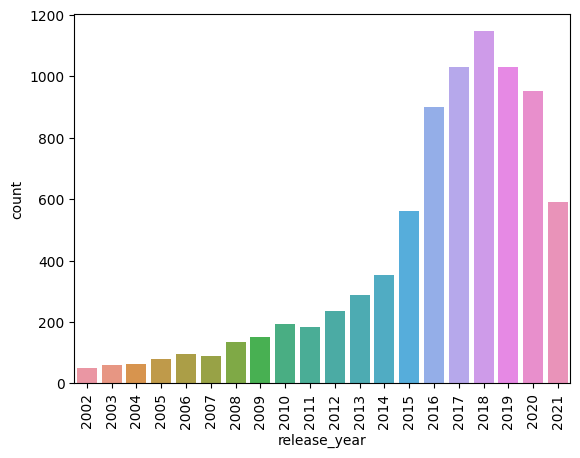

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=dff2,x='release_year',y='count')
plt.xticks(rotation=90)
plt.show()

With the help of the graph we can clearly see year 2018 had most releases.

**Lets find out No. of Movies and T V Shows**

In [13]:
dff['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [14]:
movies_dff=dff[dff['type']=='Movie']
tv_show=dff[dff['type']!='Movie']
movies_dff.shape
tv_show.shape

(2676, 13)

In [16]:
x=len(movies_dff)
y=len(tv_show)
print('The no. of movies in netfix is : ',x,'\n\nThe no. of T V Shows in netflix is : ',y)

The no. of movies in netfix is :  6131 

The no. of T V Shows in netflix is :  2676


**What year did netflix added more content to the platform?**

The contents may released in year from mid 90s but the netflix was developed in 2010s.

In [17]:
dff['date_added']=pd.to_datetime(dff['date_added'])

In [19]:
dff['Year']=dff['date_added'].dt.year

In [20]:
dff2=dff.groupby('Year')['count'].sum().reset_index()

In [21]:
dff2.sort_values('count',ascending=False,inplace=True)
dff2.head()

,Year,count
11,2019.0,2016
12,2020.0,1879
10,2018.0,1649
13,2021.0,1498
9,2017.0,1188


Year 2019 is the year in which most of the films were added.

Independent of the year, Which is the best month to add new content?

In [22]:
dff['Month']=dff['date_added'].dt.month

In [23]:
dff3=dff.groupby('Month')['count'].sum().reset_index()
dff3.sort_values('count',ascending=False,inplace=True)
dff3.head(5)

,Month,count
6,7.0,827
11,12.0,813
8,9.0,770
3,4.0,764
9,10.0,760


Month July is considered as the best month inorder to add new content.

**Which country produces the most number of content on Netflix ?**

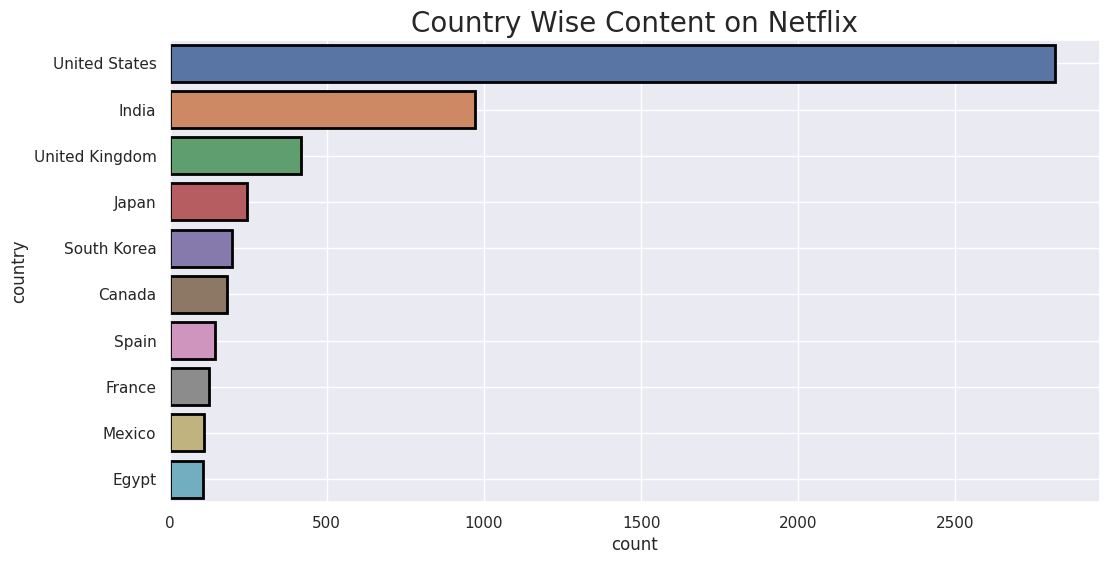

In [31]:
# Countplot of top 10 countries who produces most number of content on the Netflix.
plt.figure(figsize=(12,6))
sns.countplot(y='country',order=dff['country'].value_counts().index[0:10],data=dff,ec='black',lw=2)
plt.title('Country Wise Content on Netflix',fontsize=20)
plt.grid(True)
plt.show()

With the help of the graph we can clearly observe United States is the country who produces more number of contents over NETFLIX.

**Which category of content Netflix produces the most ?**

In [32]:
# Extract listed_in column of the dataset.
dff['listed_in']

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [33]:
# Name and count of the top 5 most category content on the Netflix.
dff['listed_in'].value_counts().head()

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: listed_in, dtype: int64

**What is the duration of most of the shows on the Netflix ?**

In [36]:
# Name and count of the top duration of the dataset.
dff['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [37]:
# Name of the top 10 durations of the dataset. 
x=list(dff['duration'].value_counts().head(10).keys())
x

['1 Season',
 '2 Seasons',
 '3 Seasons',
 '90 min',
 '94 min',
 '97 min',
 '93 min',
 '91 min',
 '95 min',
 '96 min']

**Comapare the growth in production of Movies and TV Shows of the Netflix ?**

In [39]:
# Create a dataset by groupby method where we have type,release_year and title as columns.
type_year = (dff.groupby(['type','release_year'])['title'].size()).reset_index()
type_year

,type,release_year,title
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,380
116,TV Show,2019,397
117,TV Show,2020,436


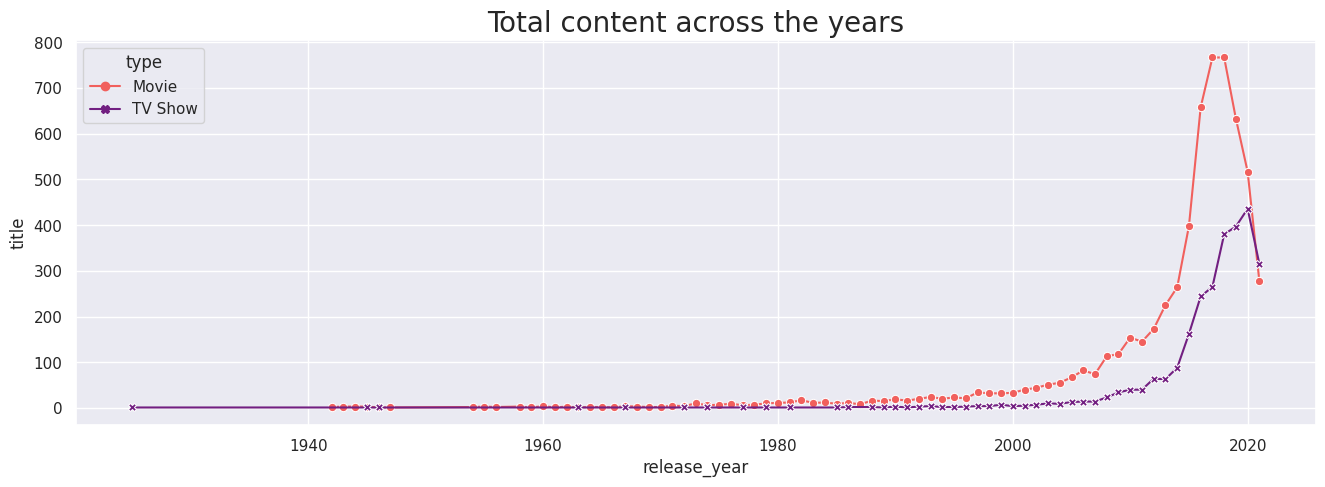

In [40]:
# LinePlot which compare the growth of production of Movies and TV SHows of the Netflix.
fig = plt.figure(figsize=(16,5))
sns.lineplot(data = type_year,x = 'release_year',y = 'title',hue = 'type',style = 'type',palette='magma_r',markers=True, dashes=False)
plt.title("Total content across the years",fontsize=20)
plt.grid(True)
plt.show()

At last, to conclude our analysis, I will analyze the sentiment of content on Netflix:

In [41]:
dfx=dff[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent


dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['Release Year']>=2010]
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
fig4.show()

So the above graph shows that the overall positive content is always greater than the neutral and negative content combined.

I hope you liked this article on a data science project on Netflix Data Analysis with Python programming language.